# All Sky Survey

In [1]:
from Analysis import query_gaia_halo_rgb
from Analysis import reddening_correction
from Analysis import halo_rgb_filter
from Analysis import plot_sky_density
from Analysis import plot_sky_density_healpy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import votable
from astropy.table import Table
rerun_gaia = False

In [107]:
from astroquery.gaia import Gaia
Gaia.login(user='jtutt', password='49MontaguGaia')

INFO: Login to gaia TAP server [astroquery.gaia.core]
401 Error 401:
<!doctype html><html lang="en"><head><title>HTTP Status 401 – Unauthorized</title><style type="text/css">body {font-family:Tahoma,Arial,sans-serif;} h1, h2, h3, b {color:white;background-color:#525D76;} h1 {font-size:22px;} h2 {font-size:16px;} h3 {font-size:14px;} p {font-size:12px;} a {color:black;} .line {height:1px;background-color:#525D76;border:none;}</style></head><body><h1>HTTP Status 401 – Unauthorized</h1><hr class="line" /><p><b>Type</b> Status Report</p><p><b>Message</b> Bad Credentials</p><p><b>Description</b> The request has not been applied to the target resource because it lacks valid authentication credentials for that resource.</p><hr class="line" /><h3>Apache Tomcat/9.0.93</h3></body></html>


ERROR: Error logging in TAP server [astroquery.gaia.core]


### Gaia Query - Do Not Require Radial Velocity Info

In [6]:
if rerun_gaia:
    all_sky_streams_non_rv = query_gaia_halo_rgb(ra_min = 0, ra_max = 360, dec_min = -90, dec_max = 90, g_max=24, parallax_max=1.0, ruwe_max=1.4, chunk_size=4, radial_velocity = False , save_path = 'data/AllSky_gaia_non_rv.csv')

### Gaia Query - Require Radial Velocity Info

In [7]:
if rerun_gaia:
    all_sky_streams_rv = query_gaia_halo_rgb(ra_min = 0, ra_max = 360, dec_min = -90, dec_max = 90, g_max=24, parallax_max=1.0, ruwe_max=1.4, chunk_size=3.5, radial_velocity = True , save_path = 'data/AllSky_gaia_rv.csv')

### Re-Extract Data

In [3]:
# --------------- Re-Load Gaia Data from file ---------------
# Load the VOTable file
votable_data = votable.parse('data/Gaia_7025173.vot')

# Extract the first table (VOTable files can have multiple tables)
AllSky_gaia_non_rv = Table(votable_data.get_first_table().to_table()).to_pandas()

In [106]:
# Convert Pandas DataFrame to Astropy Table
AllSky_gaia_non_rv_astropy = Table.from_pandas(AllSky_gaia_non_rv)

# Save as FITS file
AllSky_gaia_non_rv_astropy.write("data/Gaia_7025173.fits", format="fits", overwrite=True)

In [5]:
AllSky_gaia_non_rv.describe()

,SOURCE_ID,l,b,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,parallax,parallax_error,ruwe,pmra,pmdec,radial_velocity,mh_gspphot,teff_gspphot,logg_gspphot
count,7.025173e+06,7.025173e+06,7.025173e+06,7.025173e+06,7.025173e+06,7.025173e+06,7.025171e+06,7.025173e+06,7.025173e+06,7.025173e+06,7.025173e+06,7.025173e+06,7.025173e+06,3.840256e+06,7.025173e+06,7.025173e+06,7.025173e+06
mean,4.471522e+18,1.700139e+02,-1.295418e+00,2.490474e+02,-2.232012e+01,1.515704e+01,1.674467e+01,1.401960e+01,1.803060e-01,5.388764e-02,1.017380e+00,-2.753899e+00,-3.616930e+00,-6.654542e+00,-3.945556e-02,4.489416e+03,2.193303e+00
std,1.332474e+18,1.479965e+02,9.405341e+00,5.754805e+01,3.086225e+01,1.600989e+00,2.306947e+00,1.437904e+00,1.794784e-01,5.293216e-02,9.317025e-02,2.707438e+00,3.076002e+00,6.545847e+01,4.157774e-01,3.370196e+02,7.133733e-01
min,1.875054e+14,5.103727e-07,-8.965331e+01,2.052024e-04,-8.988971e+01,5.324928e+00,6.652758e+00,4.210206e+00,-3.933324e+00,7.587990e-03,4.422632e-01,-7.624939e+01,-7.705483e+01,-9.066071e+02,-3.997300e+00,2.928687e+03,-5.000000e-01
25%,4.058073e+18,2.200649e+01,-4.906559e+00,2.406855e+02,-4.511246e+01,1.418039e+01,1.518507e+01,1.318586e+01,8.649140e-02,2.091612e-02,9.640759e-01,-4.375838e+00,-5.662039e+00,-4.646467e+01,-2.284000e-01,4.473716e+03,1.959700e+00
50%,4.251605e+18,1.015746e+02,-1.344519e+00,2.676594e+02,-2.747769e+01,1.519285e+01,1.640885e+01,1.411816e+01,1.673705e-01,3.337722e-02,1.006966e+00,-2.665282e+00,-3.884639e+00,-8.177404e+00,3.020000e-02,4.608511e+03,2.429100e+00
75%,5.862649e+18,3.279626e+02,2.978401e+00,2.801621e+02,-5.157374e+00,1.615455e+01,1.808990e+01,1.494788e+01,2.676844e-01,6.215902e-02,1.057257e+00,-1.073008e+00,-1.789028e+00,3.138556e+01,1.932000e-01,4.696305e+03,2.700200e+00
max,6.917522e+18,3.600000e+02,8.936495e+01,3.600000e+02,8.966287e+01,1.899996e+01,2.397472e+01,1.790803e+01,9.999983e-01,1.159783e+00,1.399997e+00,8.166203e+01,3.604324e+01,8.450710e+02,8.000000e-01,4.799998e+03,2.999900e+00


In [10]:
from astropy.coordinates import Angle

# Given Right Ascension and Declination
ra_hms = "05h 14m 06.76s"
dec_dms = "-40d 02m 47.6s"

# Convert to degrees
ra_deg = Angle(ra_hms).degree
dec_deg = Angle(dec_dms).degree

print(f"RA in degrees: {ra_deg}")
print(f"Dec in degrees: {dec_deg}")

len(AllSky_gaia_non_rv[(AllSky_gaia_non_rv["ra"]>78 ) & (AllSky_gaia_non_rv["ra"]<79.5 ) & (AllSky_gaia_non_rv["dec"]<-39 ) * (AllSky_gaia_non_rv["dec"]>-41 ) ])

RA in degrees: 78.52816666666665
Dec in degrees: -40.04655555555556


30

In [11]:
# Dereddened magnitudes and store the results
AllSky_gaia_non_rv_dered = reddening_correction(AllSky_gaia_non_rv)

2 rows removed due to missing values in required columns.


/Users/jacobtutt/Desktop/MPhil_DIS/Gal_Arc/Coursework_GA/Analysis/GA_analysis.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaia_data['dered_G'] = gaia_data['phot_g_mean_mag'] - R_G * ebv
/Users/jacobtutt/Desktop/MPhil_DIS/Gal_Arc/Coursework_GA/Analysis/GA_analysis.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaia_data['dered_BP'] = gaia_data['phot_bp_mean_mag'] - R_BP * ebv
/Users/jacobtutt/Desktop/MPhil_DIS/Gal_Arc/Coursework_GA/Analysis/GA_analysis.py:155: SettingWithCopyWarning: 
A valu

In [ ]:
### Halo RGB Stars filtering
def halo_rgb_filter(gaia_data, min_br=1, max_br=2.5, min_abs_mag=3, halo_radius_min=15, halo_radius_max=300, pm_min = 5):
    """
    Filters Gaia DR3 data to select Red Giant Branch (RGB) stars in the Galactic halo.

    This function applies multiple selection criteria to extract halo RGB stars:
    1. **Parallax Cut**: Removes stars with negative parallaxes.
    2. **Distance Calculation**: Computes distance (kpc) from parallax.
    3. **Absolute Magnitude Calculation**: Computes Gaia G-band absolute magnitude M_G.
    4. **Galactocentric Transformation**: Converts coordinates to Galactocentric cylindrical frame.
    5. **Color Selection**: Filters stars based on (BP - RP) color range for red giants.
    6. **Luminosity Selection**: Filters by absolute magnitude to exclude dwarfs.
    7. **Galactic Radius Selection**: Filters out disk stars by requiring R_gc > halo_radius.

    Parameters:
        gaia_data (pd.DataFrame): Input DataFrame containing Gaia DR3 data. 
                                  Required columns: 
                                  'ra', 'dec', 'parallax', 'dered_G', 'dered_BP', 'dered_RP'.
        min_br (float, optional): Minimum (BP - RP) color index for RGB selection. Default is 1.0.
        max_br (float, optional): Maximum (BP - RP) color index for RGB selection. Default is 2.5.
        min_abs_mag (float, optional): Minimum absolute magnitude M_G to exclude bright giants. Default is 3.
        halo_radius (float, optional): Minimum Galactocentric radius (kpc) for halo selection. Default is 15.

    Returns:
        pd.DataFrame: A filtered DataFrame containing only halo RGB stars.
                      Adds the following computed columns:
                      - 'dist_kpc': Distance from Sun in kpc.
                      - 'M_G': Absolute G-band magnitude.
                      - 'R_gc': Galactocentric radius (kpc).
                      - 'phi_gc': Galactic azimuthal angle (deg).
                      - 'z_gc': Galactocentric height (kpc).

    Notes:
        - Parallax values must be positive, as negative parallaxes are unphysical.
        - The absolute magnitude calculation follows the standard distance modulus equation:
          M_G = G - 5 log10(d_pc) + 5.
        - Galactocentric coordinates are computed assuming R_0 = 8.1 kpc and z_sun = 25 pc.
        - The color and magnitude cuts are designed to select RGB stars and exclude main-sequence dwarfs.
    """

    # Remove negative parallaxes
    gaia_data = gaia_data[gaia_data["parallax"] > 0].copy()

    # Compute distance (kpc) and absolute magnitude
    gaia_data["dist_kpc"] = 1 / gaia_data["parallax"]  
    gaia_data["M_G"] = gaia_data["dered_G"] - 5 * np.log10(gaia_data["dist_kpc"] * 1000) + 5

    # Compute Proper Motion (Total)
    gaia_data["pm_total"] = np.sqrt(gaia_data["pmra"]**2 + gaia_data["pmdec"]**2)

    # Transform to Galactocentric coordinates
    coords_icrs = SkyCoord(ra=gaia_data['ra'].values * u.deg,  
                           dec=gaia_data['dec'].values * u.deg, 
                           distance=gaia_data['dist_kpc'].values * u.kpc, frame='icrs')
    gc_frame = Galactocentric(galcen_distance=8.1 * u.kpc, z_sun=25 * u.pc)
    coords_gc = coords_icrs.transform_to(gc_frame)
    coords_gc.representation_type = 'cylindrical'

    # Extract Galactocentric distances
    gaia_data["R_gc_cyl"] = coords_gc.rho.to(u.kpc).value
    gaia_data["phi_gc_cyl"] = 180 - coords_gc.phi.to(u.deg).value  # Convert to left-handed system
    gaia_data["z_gc_cyl"] = coords_gc.z.to(u.kpc).value

    # Define filters
    # Based on BP-RP color index 
    mask_bp_rp = (gaia_data['dered_BP'] - gaia_data['dered_RP'] > min_br) & \
                 (gaia_data['dered_BP'] - gaia_data['dered_RP'] < max_br)
    # Based on magnitudes
    mask_abs_mag = gaia_data["M_G"] < min_abs_mag 
    # Based on Galactocentric radius
    total_radius = (gaia_data["R_gc_cyl"]**2 + gaia_data["z_gc_cyl"]**2)**(1/2) # Overall Radius
    mask_halo = (total_radius > halo_radius_min) & (total_radius < halo_radius_max)
    # Proper Motion 
    mask_pm = gaia_data["pm_total"] < pm_min  # Only retain stars with low proper motion
    # Apply combined filter
    mask_total = mask_bp_rp & mask_abs_mag & mask_halo & mask_pm

    # Count stars passing each filter
    num_total = len(gaia_data)
    num_bp_rp = mask_bp_rp.sum()
    num_abs_mag = mask_abs_mag.sum()
    num_halo = mask_halo.sum()
    num_passed = mask_total.sum()

    print(f"Total stars before filtering: {num_total}")
    print(f"Stars passing BP-RP color filter: {num_bp_rp} ({num_bp_rp/num_total:.2%})")
    print(f"Stars passing absolute magnitude filter: {num_abs_mag} ({num_abs_mag/num_total:.2%})")
    print(f"Stars passing halo distance filter: {num_halo} ({num_halo/num_total:.2%})")
    print(f"Stars passing proper motion filter: {mask_pm.sum()} ({mask_pm.sum()/num_total:.2%})")
    print(f"Stars passing all filters: {num_passed} ({num_passed/num_total:.2%})")

    return gaia_data[mask_total]

In [12]:
AllSky_gaia_halo = halo_rgb_filter(AllSky_gaia_non_rv_dered, min_br=1, max_br=5, min_abs_mag=3, halo_radius_min=15, halo_radius_max=250, pm_min = 5)

Total stars before filtering: 6316741
Stars passing BP-RP color filter: 4438354 (70.26%)
Stars passing absolute magnitude filter: 6303590 (99.79%)
Stars passing halo distance filter: 453974 (7.19%)
Stars passing proper motion filter: 2651212 (41.97%)
Stars passing all filters: 144113 (2.28%)


In [15]:
len(AllSky_gaia_halo[(AllSky_gaia_halo["ra"]>78 ) & (AllSky_gaia_halo["ra"]<79.5 ) & (AllSky_gaia_halo["dec"]<-39 ) * (AllSky_gaia_halo["dec"]>-41 ) ])

19

In [6]:
import numpy as np
import healpy as hp

def binning_analysis(gaia_data, nside=128, bin_min=20, bin_max=40):
    """
    Identifies Healpix bins with star counts between bin_min and bin_max 
    and returns their Galactic coordinates as a DataFrame.

    Parameters:
    -----------
    gaia_data : pd.DataFrame
        Data containing 'l' (longitude), 'b' (latitude), and 'dered_G' (magnitude).
    nside : int, optional
        Healpy resolution parameter (default=128).
    bin_min : int, optional
        Minimum number of stars per bin to consider.
    bin_max : int, optional
        Maximum number of stars per bin to consider.

    Returns:
    --------
    selected_bins_df : pd.DataFrame
        DataFrame containing:
        - 'bin_index': Healpix bin index
        - 'l': Galactic longitude of bin center (deg)
        - 'b': Galactic latitude of bin center (deg)
        - 'star_count': Number of stars in the bin
    """

    # Extract Galactic longitude (l) and latitude (b)
    l = gaia_data['l'].values  # Galactic longitude
    b = gaia_data['b'].values  # Galactic latitude

    # Convert Galactic coordinates to Healpy angles
    theta = np.radians(90 - b)  # Healpy expects theta = 90° - b
    phi = np.radians(l)         # Healpy expects phi = l

    # Compute Healpy binning
    npix = hp.nside2npix(nside)
    density_map = np.zeros(npix)

    # Get pixel indices for each star
    pix_indices = hp.ang2pix(nside, theta, phi)

    # Count the number of stars in each bin
    np.add.at(density_map, pix_indices, 1)

    # Identify bins within the specified range
    selected_bins = np.where((density_map >= bin_min) & (density_map <= bin_max))[0]
    star_counts = density_map[selected_bins]

    # Convert bin indices back to Galactic coordinates
    selected_coords = hp.pix2ang(nside, selected_bins, lonlat=True)

    # Create DataFrame
    selected_bins_df = pd.DataFrame({
        "bin_index": selected_bins,
        "l": selected_coords[0],  # Galactic longitude
        "b": selected_coords[1],  # Galactic latitude
        "star_count": star_counts  # Number of stars in the bin
    })

    return selected_bins_df

In [ ]:
selected_bins, selctbinning_analysis(gaia_data)

In [23]:
AllSky_gaia_non_rv.head()
AllSky_gaia_non_rv.describe()
AllSky_gaia_non_rv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7025173 entries, 0 to 7025172
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SOURCE_ID         int64  
 1   l                 float64
 2   b                 float64
 3   ra                float64
 4   dec               float64
 5   phot_g_mean_mag   float32
 6   phot_bp_mean_mag  float32
 7   phot_rp_mean_mag  float32
 8   parallax          float64
 9   parallax_error    float32
 10  ruwe              float32
 11  pmra              float64
 12  pmdec             float64
 13  radial_velocity   float32
 14  mh_gspphot        float32
 15  teff_gspphot      float32
 16  logg_gspphot      float32
dtypes: float32(9), float64(7), int64(1)
memory usage: 670.0 MB


### Preform Extinction/ Reddening Correction

In [8]:
# Dereddened magnitudes and store the results
AllSky_gaia_non_rv_dered = reddening_correction(AllSky_gaia_non_rv)

2 rows removed due to missing values in required columns.


/Users/jacobtutt/Desktop/MPhil_DIS/Gal_Arc/Coursework_GA/Analysis/GA_analysis.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaia_data['dered_G'] = gaia_data['phot_g_mean_mag'] - R_G * ebv
/Users/jacobtutt/Desktop/MPhil_DIS/Gal_Arc/Coursework_GA/Analysis/GA_analysis.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaia_data['dered_BP'] = gaia_data['phot_bp_mean_mag'] - R_BP * ebv
/Users/jacobtutt/Desktop/MPhil_DIS/Gal_Arc/Coursework_GA/Analysis/GA_analysis.py:153: SettingWithCopyWarning: 
A valu

### Further filter for Red Giant Branch stars

In [74]:
AllSky_gaia_halo = halo_rgb_filter(AllSky_gaia_non_rv_dered, min_br=1, max_br=5, min_abs_mag=3, halo_radius_min=15, halo_radius_max=250, pm_min = 5)

Total stars before filtering: 6316741
Stars passing BP-RP color filter: 4438354 (70.26%)
Stars passing absolute magnitude filter: 6303590 (99.79%)
Stars passing halo distance filter: 453974 (7.19%)
Stars passing proper motion filter: 2651212 (41.97%)
Stars passing all filters: 144113 (2.28%)


In [75]:
# Define the file path
glob_clust_harris_file_path = "data/gc_harris2010.dat"  # Update with your actual path

# Read the relevent data in the files
df_table1 = pd.read_fwf(glob_clust_harris_file_path, skiprows=70, nrows=158)
df_table2 = pd.read_fwf(glob_clust_harris_file_path, skiprows=250, nrows=158)
glob_clust_harris = pd.merge(df_table1, df_table2, on="ID", suffixes=("_table1", "_table2"))

L_Harris = glob_clust_harris['L'].values
B_Harris = glob_clust_harris['B'].values

Unqiue_stream_names = ['NGC1851', 'M3', 'NGC 5053']
Unique_streams_l = np.array([244.51323, 042.21695, 335.69874])
Unique_streams_b = np.array([-35.03598, 78.70685, 78.94614])

In [103]:
import numpy as np
import healpy as hp




def binning_analysis(gaia_data, nside=128, bin_min=20, bin_max=40, range_search =2.5):
    """
    Identifies Healpix bins with star counts between bin_min and bin_max 
    and returns their Galactic coordinates as a DataFrame.

    Parameters:
    -----------
    gaia_data : pd.DataFrame
        Data containing 'l' (longitude), 'b' (latitude), and 'dered_G' (magnitude).
    nside : int, optional
        Healpy resolution parameter (default=128).
    bin_min : int, optional
        Minimum number of stars per bin to consider.
    bin_max : int, optional
        Maximum number of stars per bin to consider.

    Returns:
    --------
    selected_bins_df : pd.DataFrame
        DataFrame containing:
        - 'bin_index': Healpix bin index
        - 'l': Galactic longitude of bin center (deg)
        - 'b': Galactic latitude of bin center (deg)
        - 'star_count': Number of stars in the bin
    """

    # Extract Galactic longitude (l) and latitude (b)
    dec = gaia_data['b'].values  # Galactic longitude
    dec_filter_top = dec > 10
    dec_filter_bottom = dec < -10
    gaia_data = gaia_data[dec_filter_top | dec_filter_bottom]

    l = gaia_data['l'].values  # Galactic longitude
    b = gaia_data['b'].values  # Galactic latitude

    # Convert Galactic coordinates to Healpy angles
    theta = np.radians(90 - b)  # Healpy expects theta = 90° - b
    phi = np.radians(l)         # Healpy expects phi = l

    # Compute Healpy binning
    npix = hp.nside2npix(nside)
    density_map = np.zeros(npix)

    # Get pixel indices for each star
    pix_indices = hp.ang2pix(nside, theta, phi)

    # Count the number of stars in each bin
    np.add.at(density_map, pix_indices, 1)

    # Identify bins within the specified range
    selected_bins = np.where((density_map >= bin_min) & (density_map <= bin_max))[0]
    star_counts = density_map[selected_bins]

    density_map_filtered = np.where((density_map >= bin_min) & (density_map <= bin_max), density_map, 0)

    density_map_filtered = np.where(density_map_filtered != 0 , 1, 0)

    # --------- Plot Healpy Mollweide Projection ---------
    fig = plt.figure(figsize=(10, 6), dpi=200)
    hp.mollview(density_map_filtered, cmap="viridis", title="Selected Isolated Galactic Bins", unit="Density")
    
    # Add Galactic grid lines
    hp.graticule(color="white", alpha=0.5)
    
    # Show the plot
    plt.show()





    # Convert bin indices back to Galactic coordinates
    selected_coords = hp.pix2ang(nside, selected_bins, lonlat=True)

    stars_around_bin = []

    for i in range(len(selected_bins)):
        mask_stars_in_l_range = (l >= selected_coords[0][i] - range_search) & (l <= selected_coords[0][i] + range_search)
        mask_stars_in_b_range = (b >= selected_coords[1][i] - range_search) & (b <= selected_coords[1][i] + range_search)
        mask_stars_around_bin = mask_stars_in_l_range & mask_stars_in_b_range
        no_stars_in_range = np.sum(mask_stars_around_bin)
        stars_around_bin.append(no_stars_in_range)
    
    stars_around_bin = np.array(stars_around_bin)

    isolated = stars_around_bin < 10 * star_counts

    # Filter all for where isolated = True
    selected_bins = selected_bins[isolated]
    star_counts = star_counts[isolated]
    selected_coords = (selected_coords[0][isolated], selected_coords[1][isolated])
    stars_around_bin = stars_around_bin[isolated]

    l_remaining = selected_coords[0]
    b_remaining = selected_coords[1]

    # Convert Galactic coordinates to Healpy angles
    theta_rem = np.radians(90 - b_remaining)  # Healpy uses theta = 90° - Dec
    phi_rem = np.radians(l_remaining)         # Healpy uses phi = l


    theta_harris = np.radians(90 - B_Harris)  # Healpy uses theta = 90° - Dec
    phi_harris = np.radians(L_Harris)         # Healpy uses phi = l

    theta_unique_streams = np.radians(90 - Unique_streams_b)  # Healpy uses theta = 90° - Dec
    phi_unique_streams = np.radians(Unique_streams_l)         # Healpy uses phi = l



    # Create an empty Healpix map
    npix = hp.nside2npix(nside)
    healpy_map = np.zeros(npix)
    healpy_map_harris = np.zeros(npix)
    healpy_map_unique_streams = np.zeros(npix)

    # Get pixel indices for the selected bins
    pix_indices = hp.ang2pix(nside, theta_rem, phi_rem)

    pix_indices_harris = hp.ang2pix(nside, theta_harris, phi_harris)

    pix_indices_unique_streams = hp.ang2pix(nside, theta_unique_streams, phi_unique_streams)

    # Assign a value of 1 to each selected pixel for visualization
    healpy_map[pix_indices] = 1

    healpy_map_harris[pix_indices_harris] = 1

    healpy_map_unique_streams[pix_indices_unique_streams] = 1




        # --------- Plot Healpy Mollweide Projection ---------
    fig = plt.figure(figsize=(10, 6), dpi=200)
    hp.mollview(healpy_map_harris, cmap="viridis", title="Harris Isolated Galactic Bins", unit="Density")
   
    
    # Add Galactic grid lines
    hp.graticule(color="white", alpha=0.5)
    
    # Show the plot
    plt.show()


    # --------- Plot Healpy Mollweide Projection ---------
    fig = plt.figure(figsize=(10, 6), dpi=200)
    hp.mollview(healpy_map, cmap="viridis", title="Selected Isolated Galactic Bins", unit="Density")
   
    
    # Add Galactic grid lines
    hp.graticule(color="white", alpha=0.5)
    
    # Show the plot
    plt.show()




    # --------- Plot Healpy Mollweide Projection ---------
    fig = plt.figure(figsize=(10, 6), dpi=200)
    hp.mollview(healpy_map_unique_streams, cmap="viridis", title="Unique Streams Isolated Galactic Bins", unit="Density")

    # Add Galactic grid lines
    hp.graticule(color="white", alpha=0.5)

    # Show the plot
    plt.show()






    # Create DataFrame
    selected_bins_df = pd.DataFrame({
        "bin_index": selected_bins,
        "l": selected_coords[0],  # Galactic longitude
        "b": selected_coords[1],  # Galactic latitude
        "star_count": star_counts,  # Number of stars in the bin
        "stars_around_bin": stars_around_bin
    })

    return selected_bins_df

<Figure size 2000x1200 with 0 Axes>

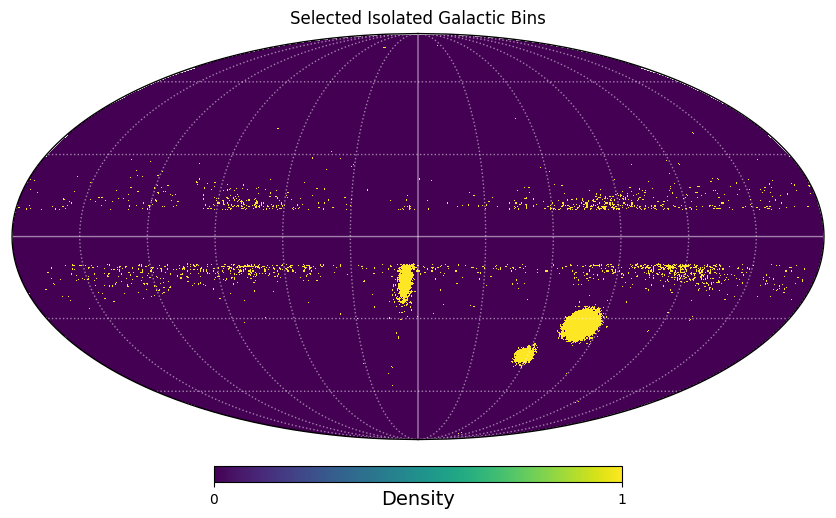

<Figure size 2000x1200 with 0 Axes>

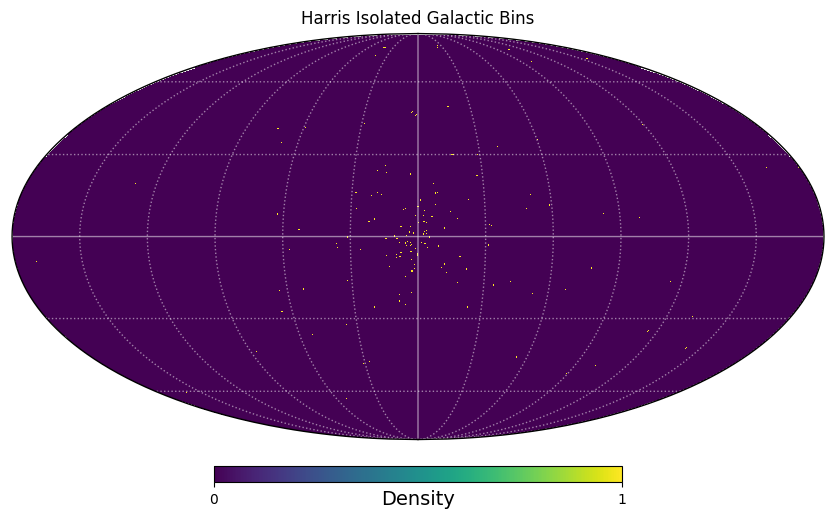

<Figure size 2000x1200 with 0 Axes>

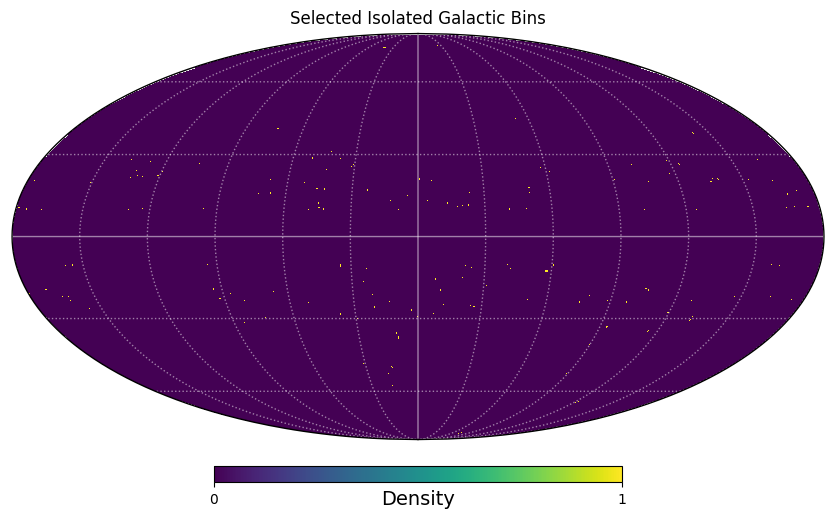

<Figure size 2000x1200 with 0 Axes>

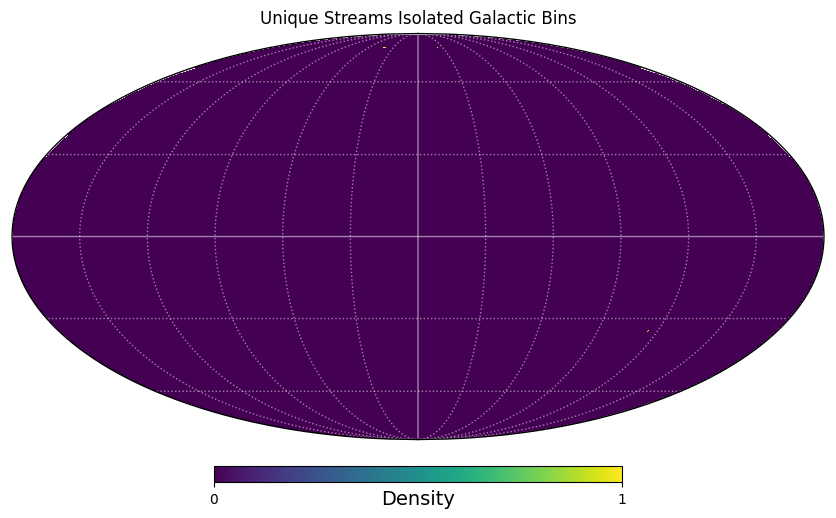

In [104]:
results = binning_analysis(AllSky_gaia_halo, nside=128, bin_min=3, bin_max=800, range_search=2)

In [88]:
# Define matching tolerance (in degrees)
tolerance = 0.5  # Adjust this as needed

# Extract coordinates from both datasets
l_results = results['l'].values
b_results = results['b'].values

# Create masks where absolute differences are within the tolerance
matches = []
for i in range(len(L_Harris)):
    mask = (np.abs(l_results - L_Harris[i]) < tolerance) & (np.abs(b_results - B_Harris[i]) < tolerance)
    
    if np.any(mask):  # If at least one match found
        matches.append((L_Harris[i], B_Harris[i]))  # Store matching points

# Convert matches to numpy array
matches = np.array(matches)

print(f"Found {len(matches)} matching points.")
print(matches)

Found 9 matching points.
[[270.54 -52.12]
 [244.51 -35.03]
 [227.23 -29.35]
 [332.96  79.76]
 [ 42.22  78.71]
 [ 73.64  40.31]
 [345.56  -6.74]
 [ 20.3  -25.75]
 [ 30.51 -47.68]]


In [38]:
results.describe()

,bin_index,l,b,star_count,stars_around_bin
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [48]:
AllSky_gaia_halo.describe()

,SOURCE_ID,l,b,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,parallax,parallax_error,...,logg_gspphot,dered_G,dered_BP,dered_RP,dist_kpc,M_G,pm_total,R_gc_cyl,phi_gc_cyl,z_gc_cyl
count,4.311120e+05,431112.000000,431112.000000,431112.000000,431112.000000,431112.000000,431112.000000,431112.000000,431112.000000,431112.000000,...,431112.000000,431112.000000,431112.000000,431112.000000,431112.000000,431112.000000,431112.000000,431112.000000,431112.000000,431112.000000
mean,3.186937e+18,180.593986,-2.989928,159.236425,2.998197,14.356295,15.361466,13.399685,0.152030,0.024500,...,2.252075,13.518744,14.154889,12.681858,18.575194,-1.444868,2.665197,20.181493,185.574035,-2.982241
std,1.906501e+18,91.628803,15.877881,104.041005,43.917200,1.273719,1.368185,1.262152,0.114729,0.012935,...,0.531846,1.306341,1.325935,1.336893,29.376524,1.718441,1.303154,23.732623,136.719837,14.416609
min,3.102341e+14,0.000014,-89.653310,0.000205,-89.429030,6.564593,8.412962,5.305089,0.003877,0.008292,...,-0.380200,4.909546,5.131294,3.789963,1.906506,-11.488175,0.004709,0.042768,0.000289,-237.456991
25%,1.934569e+18,110.657801,-9.583353,83.249665,-31.728807,13.510494,14.398849,12.596901,0.049748,0.015970,...,2.001100,12.697526,13.301797,11.863987,4.288441,-2.412909,1.629212,10.889867,32.248968,-1.665008
50%,3.152287e+18,187.028827,-2.605287,116.387779,3.522237,14.421000,15.368476,13.491024,0.130812,0.020357,...,2.341500,13.579206,14.181115,12.763927,7.644538,-1.257912,2.556012,12.349791,184.996199,-0.223019
75%,4.685878e+18,251.776852,6.573418,270.398540,44.487260,15.300048,16.367057,14.321428,0.233185,0.028916,...,2.633600,14.396673,15.032619,13.576476,20.101345,-0.111060,3.792040,17.280582,330.573123,0.796569
max,6.917286e+18,359.999852,89.110275,359.999963,89.662867,18.832638,21.647007,17.339060,0.524520,0.243925,...,2.999900,18.446699,20.529757,17.052706,257.932679,2.999956,4.999984,249.102485,359.999742,240.194541


In [46]:
from astropy.coordinates import Angle

# Given Right Ascension and Declination
ra_hms = "05h 14m 06.76s"
dec_dms = "-40d 02m 47.6s"

# Convert to degrees
ra_deg = Angle(ra_hms).degree
dec_deg = Angle(dec_dms).degree

print(f"RA in degrees: {ra_deg}")
print(f"Dec in degrees: {dec_deg}")

AllSky_gaia_halo[(AllSky_gaia_halo["ra"]>78 ) & (AllSky_gaia_halo["ra"]<79.5 ) & (AllSky_gaia_halo["dec"]<-39 ) * (AllSky_gaia_halo["dec"]>-41 ) ]

RA in degrees: 78.52816666666665
Dec in degrees: -40.04655555555556


In [49]:
AllSky_gaia_halo[(AllSky_gaia_halo["ra"]>78 ) & (AllSky_gaia_halo["ra"]<79.5 ) & (AllSky_gaia_halo["dec"]<-39 ) * (AllSky_gaia_halo["dec"]>-41 ) ]

,SOURCE_ID,l,b,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,parallax,parallax_error,...,logg_gspphot,dered_G,dered_BP,dered_RP,dist_kpc,M_G,pm_total,R_gc_cyl,phi_gc_cyl,z_gc_cyl
6440204,4819278559692849664,244.564737,-34.970493,78.620539,-40.079277,14.159028,14.792924,13.400508,0.054047,0.012851,...,1.8487,14.086649,14.700043,13.343785,18.502306,-2.249480,2.353530,20.048244,316.925039,-10.559561
6440208,4819279380030011648,244.525668,-34.975513,78.608237,-40.048270,13.342171,14.096633,12.499934,0.048078,0.009849,...,1.6012,13.273906,14.007913,12.445107,20.799527,-3.316362,2.239050,21.816546,315.150371,-11.875188
6440226,4819356380202816128,243.821881,-34.885995,78.616561,-39.464408,14.111886,14.683334,13.396744,0.214273,0.014997,...,2.4645,14.030857,14.579980,13.334073,4.666938,0.685697,3.821373,10.381994,340.675608,-2.639016
6440341,4820130475045643520,243.320238,-35.080922,78.289596,-39.086441,13.783021,14.388926,13.041523,0.169996,0.011892,...,2.0461,13.705193,14.289310,12.980868,5.882496,-0.142616,0.902490,11.136077,337.278430,-3.349185
6440464,4818970971314701056,245.280748,-34.862212,78.866513,-40.646117,13.279232,14.048143,12.432736,0.052925,0.010408,...,1.4525,13.216670,13.966732,12.382380,18.894608,-3.165019,2.227517,20.297013,316.064968,-10.755218
6440491,4819180600081639168,244.725142,-34.975634,78.637606,-40.210169,12.888309,13.733743,11.990960,0.093227,0.012112,...,1.7804,12.815596,13.638246,11.931574,10.726458,-2.336686,2.285493,14.286425,326.198377,-6.112112
6440498,4819185685322838784,244.546063,-35.026890,78.544780,-40.071930,13.859414,14.506213,13.076530,0.045776,0.012675,...,2.0870,13.785356,14.410968,13.018225,21.845473,-2.911452,2.278563,22.614022,314.417011,-12.489691
6440499,4819185715383806592,244.552334,-34.999898,78.580642,-40.073287,12.619463,13.588492,11.667603,0.116395,0.011486,...,1.6659,12.552032,13.498587,11.611451,8.591428,-2.118294,2.316385,12.824401,330.295299,-4.893485
6440505,4819195546567853440,244.596427,-35.135742,78.411202,-40.127674,13.955835,14.608757,13.181406,0.059154,0.012962,...,2.1162,13.873157,14.502440,13.116334,16.904931,-2.266911,2.222658,18.805593,318.390129,-9.685726
6440510,4819197088457131776,244.538708,-35.059201,78.501875,-40.070420,12.853564,13.695051,11.959835,0.087013,0.011788,...,1.7576,12.780890,13.599661,11.900532,11.492560,-2.521194,2.399872,14.836377,325.076106,-6.564090


### Plot 

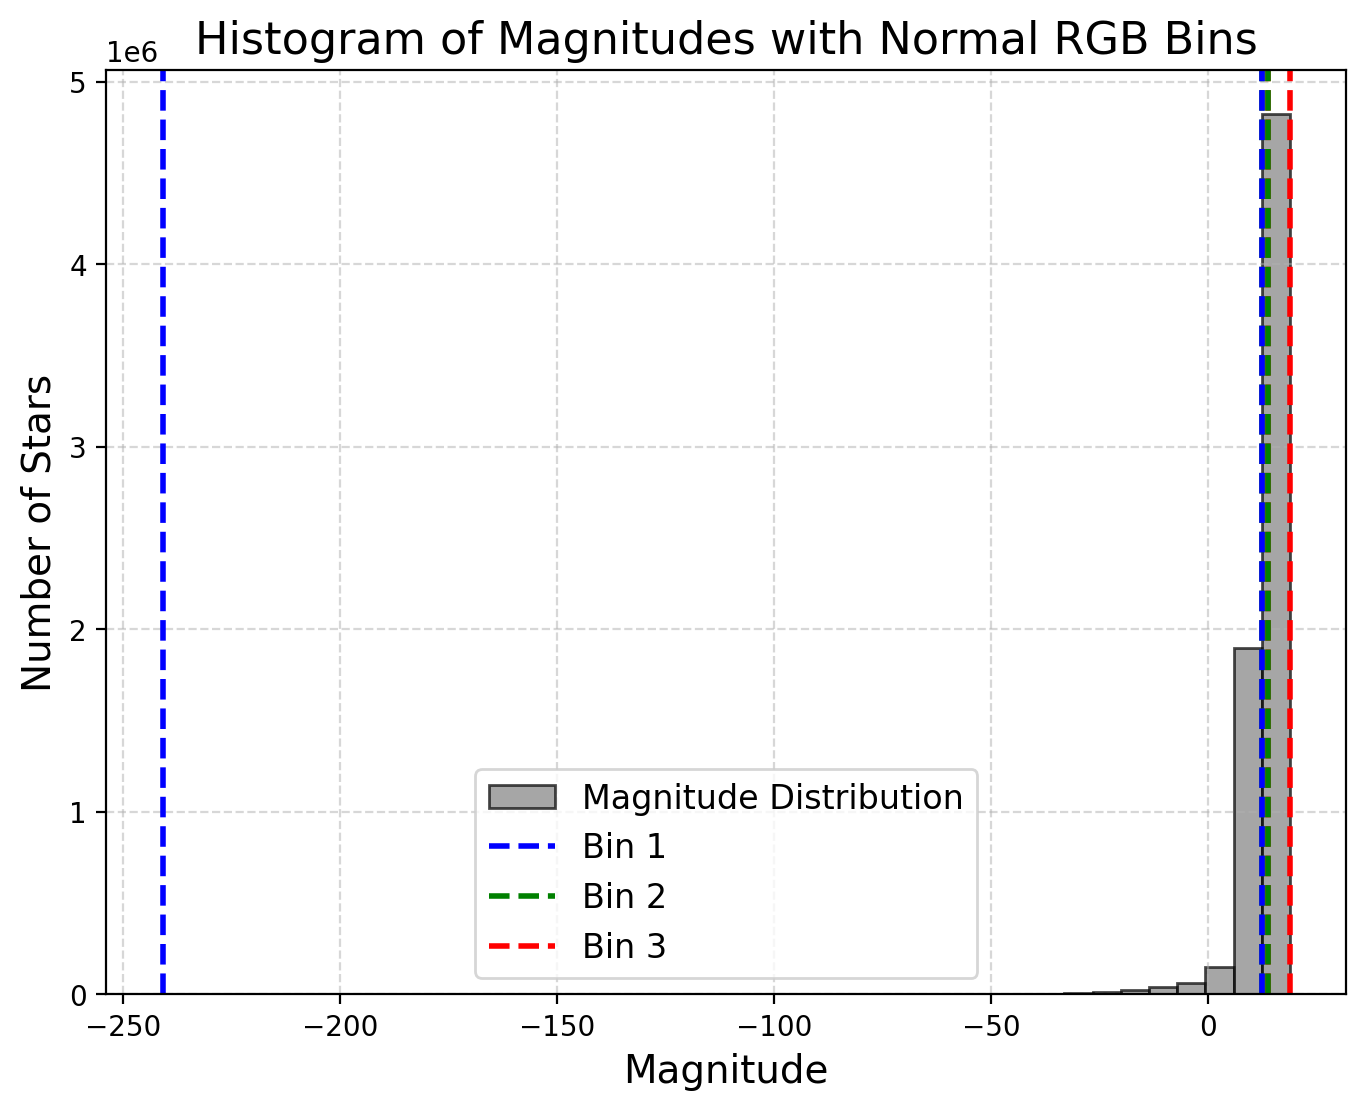

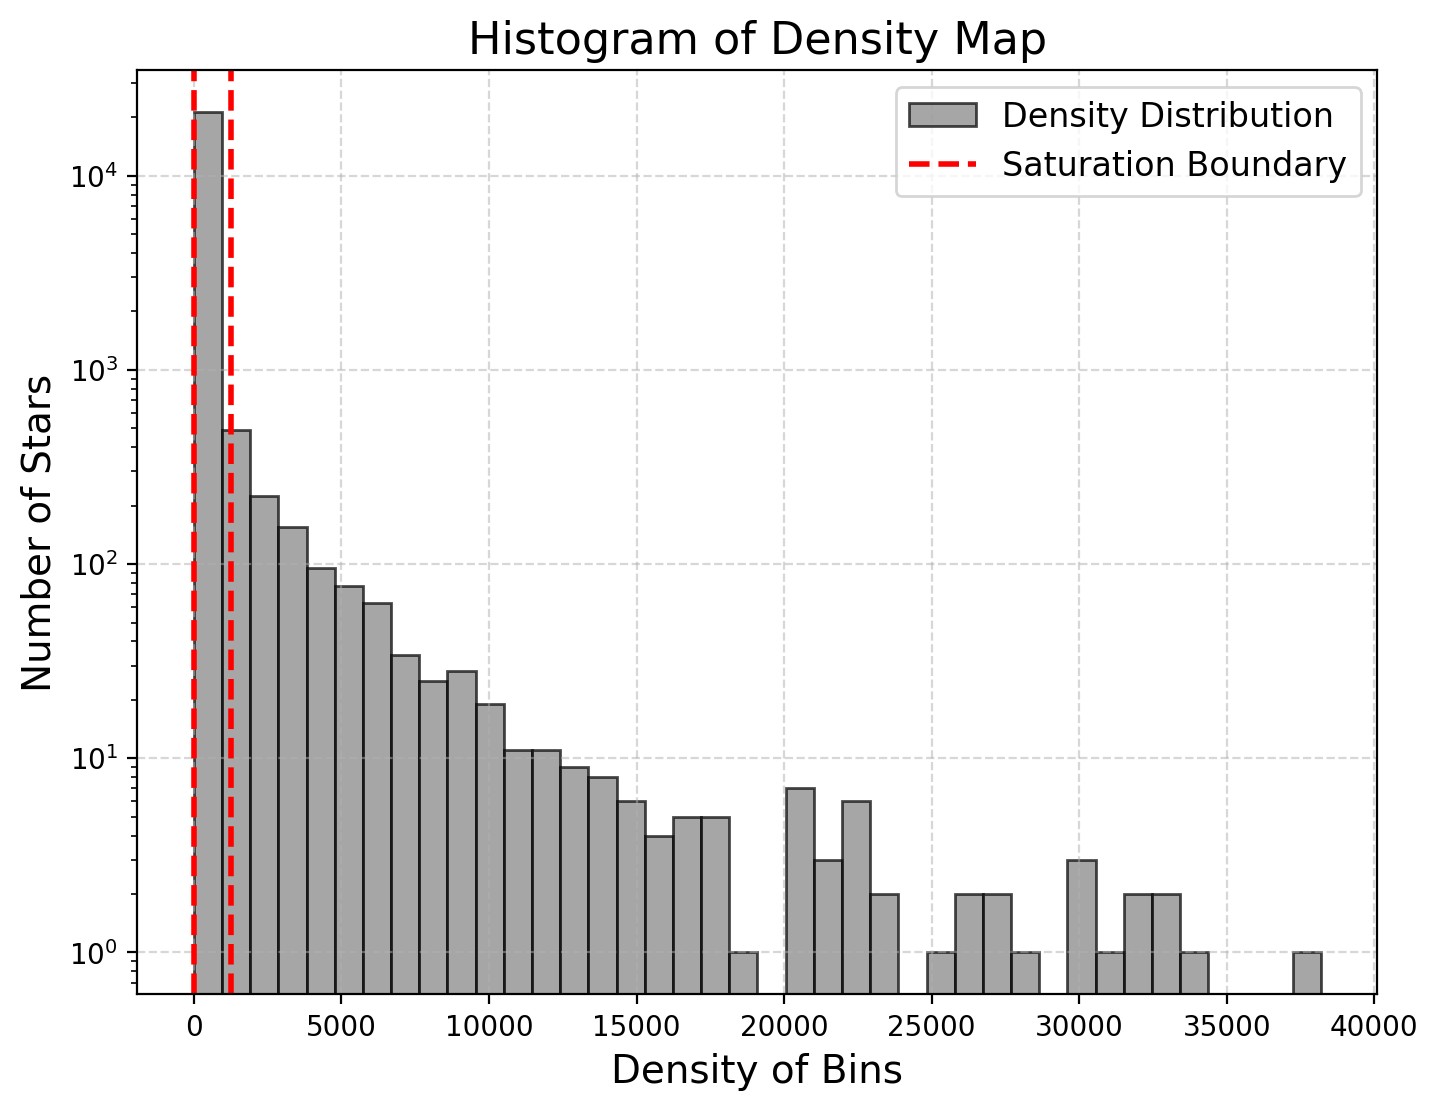

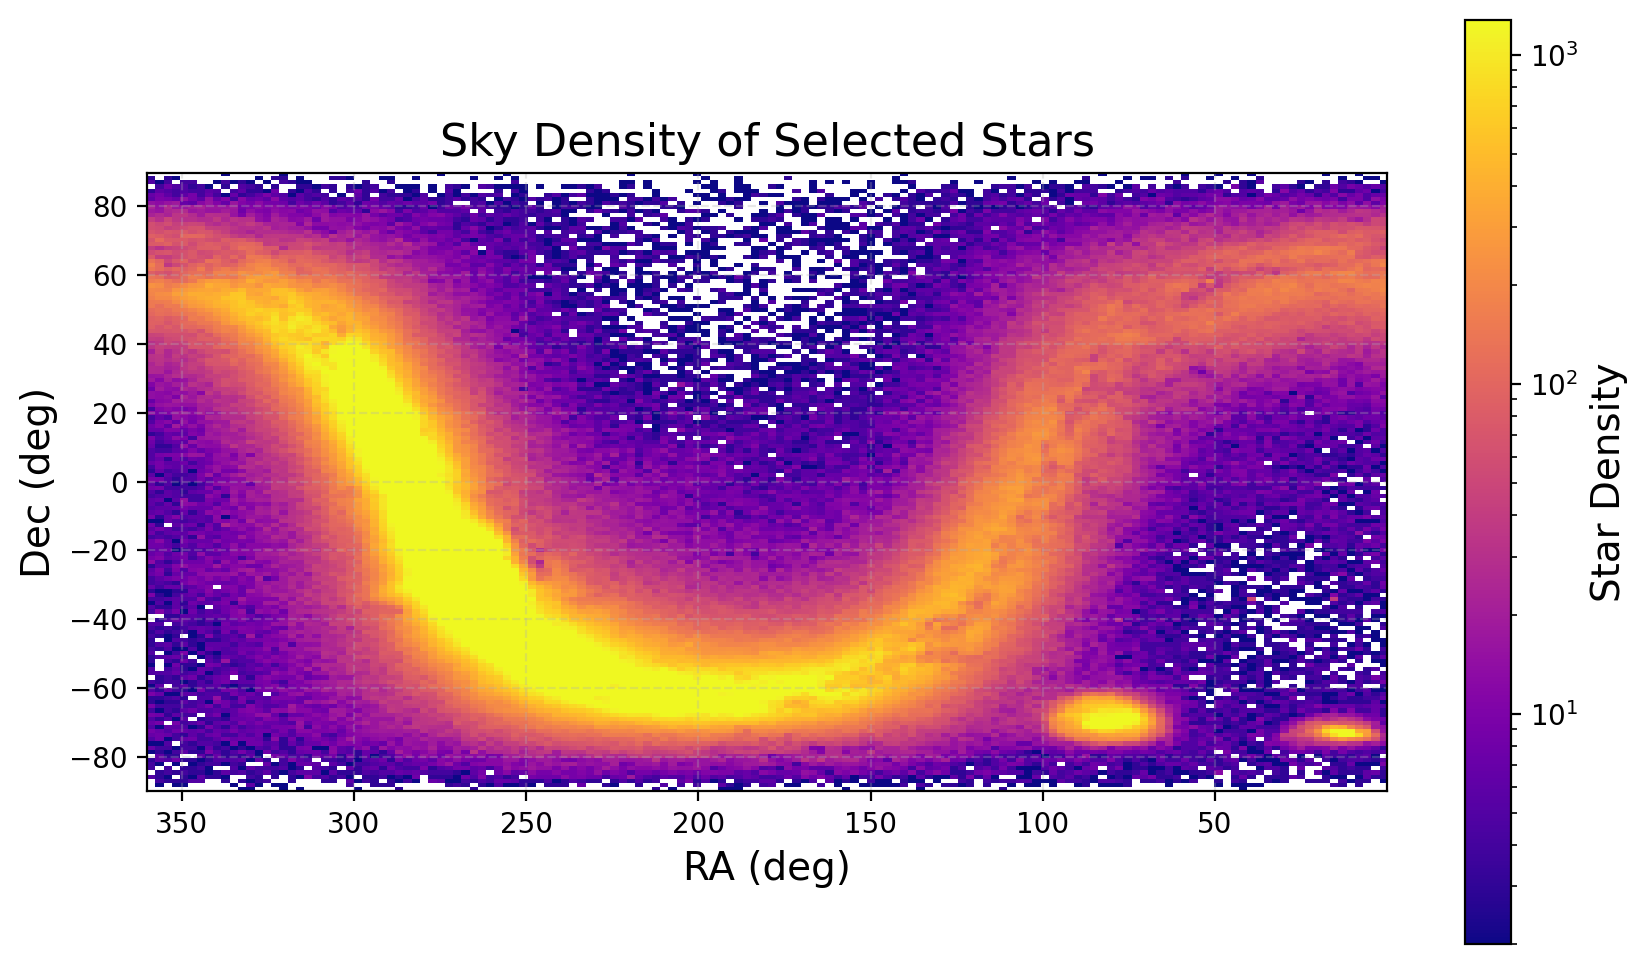

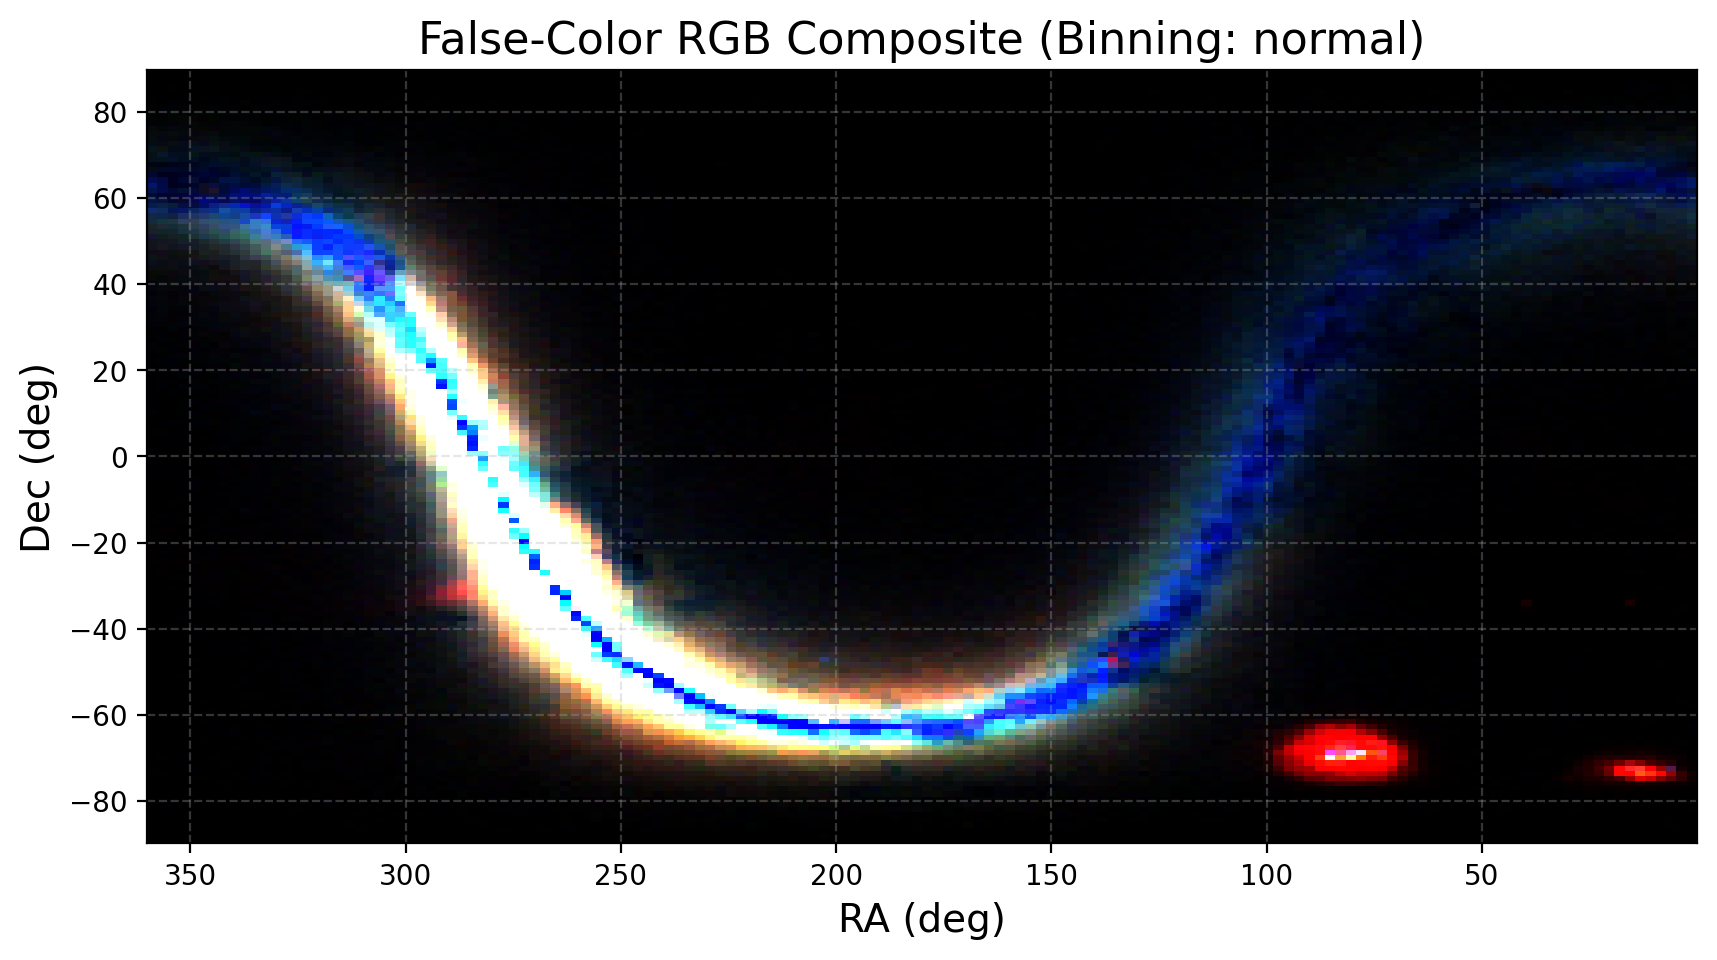

In [29]:
plot_sky_density(AllSky_gaia_non_rv_dered, bins=150, contrast=(5, 95), binning_method="normal", cmap_density="plasma", density_bins = 40,  log_scale=True)

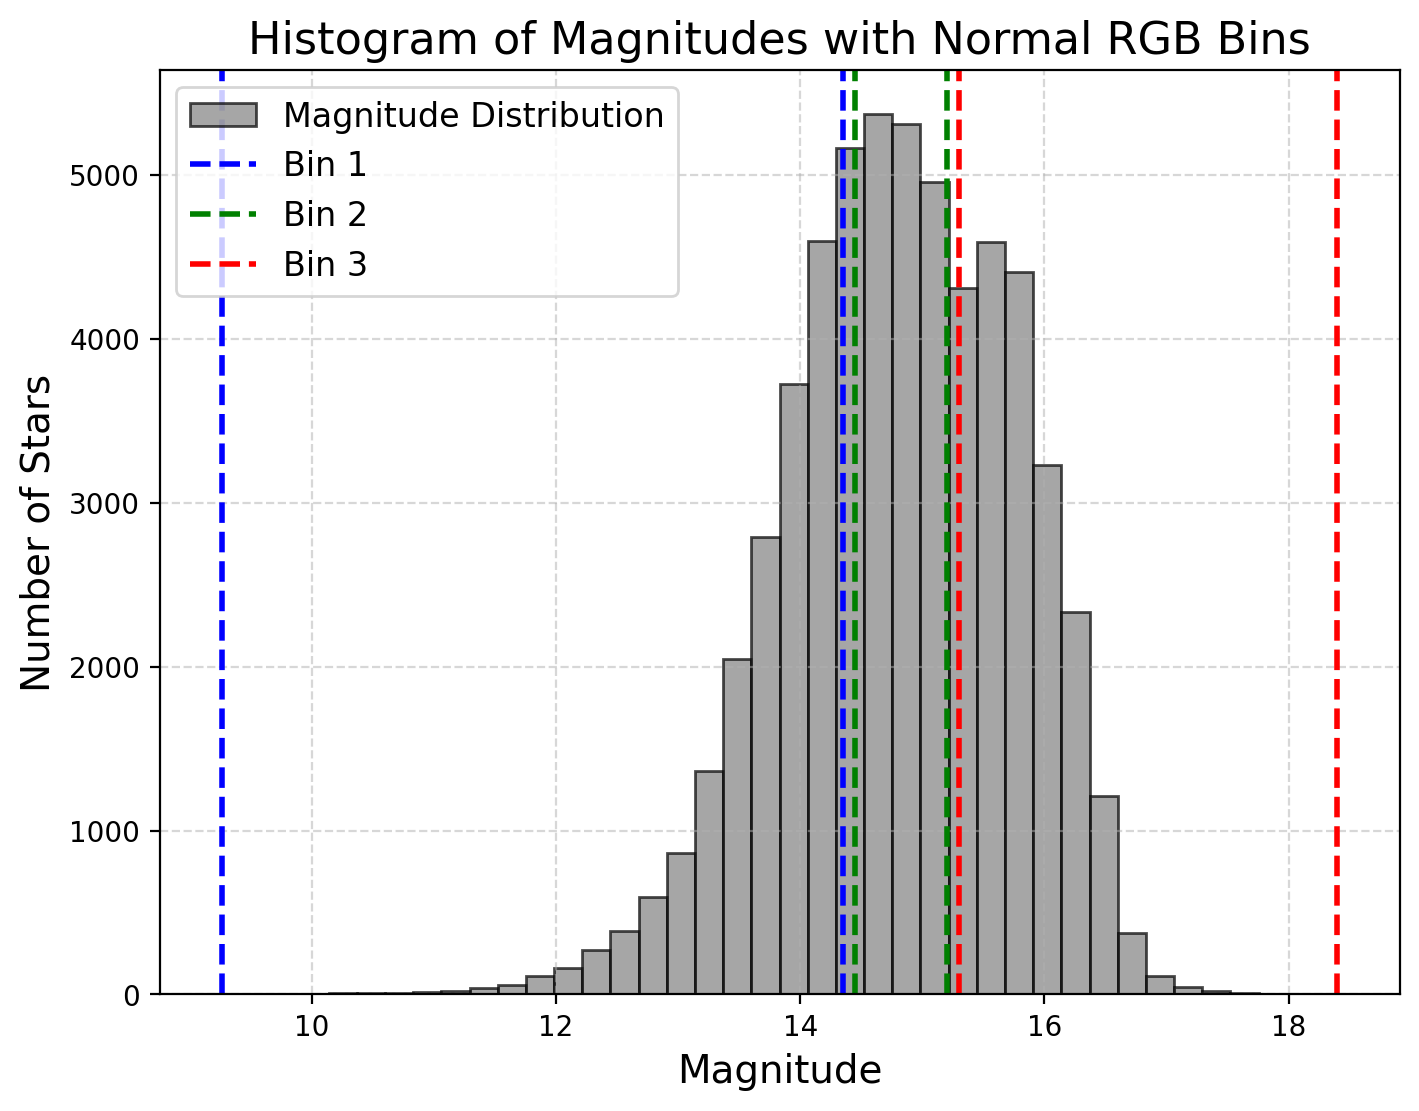

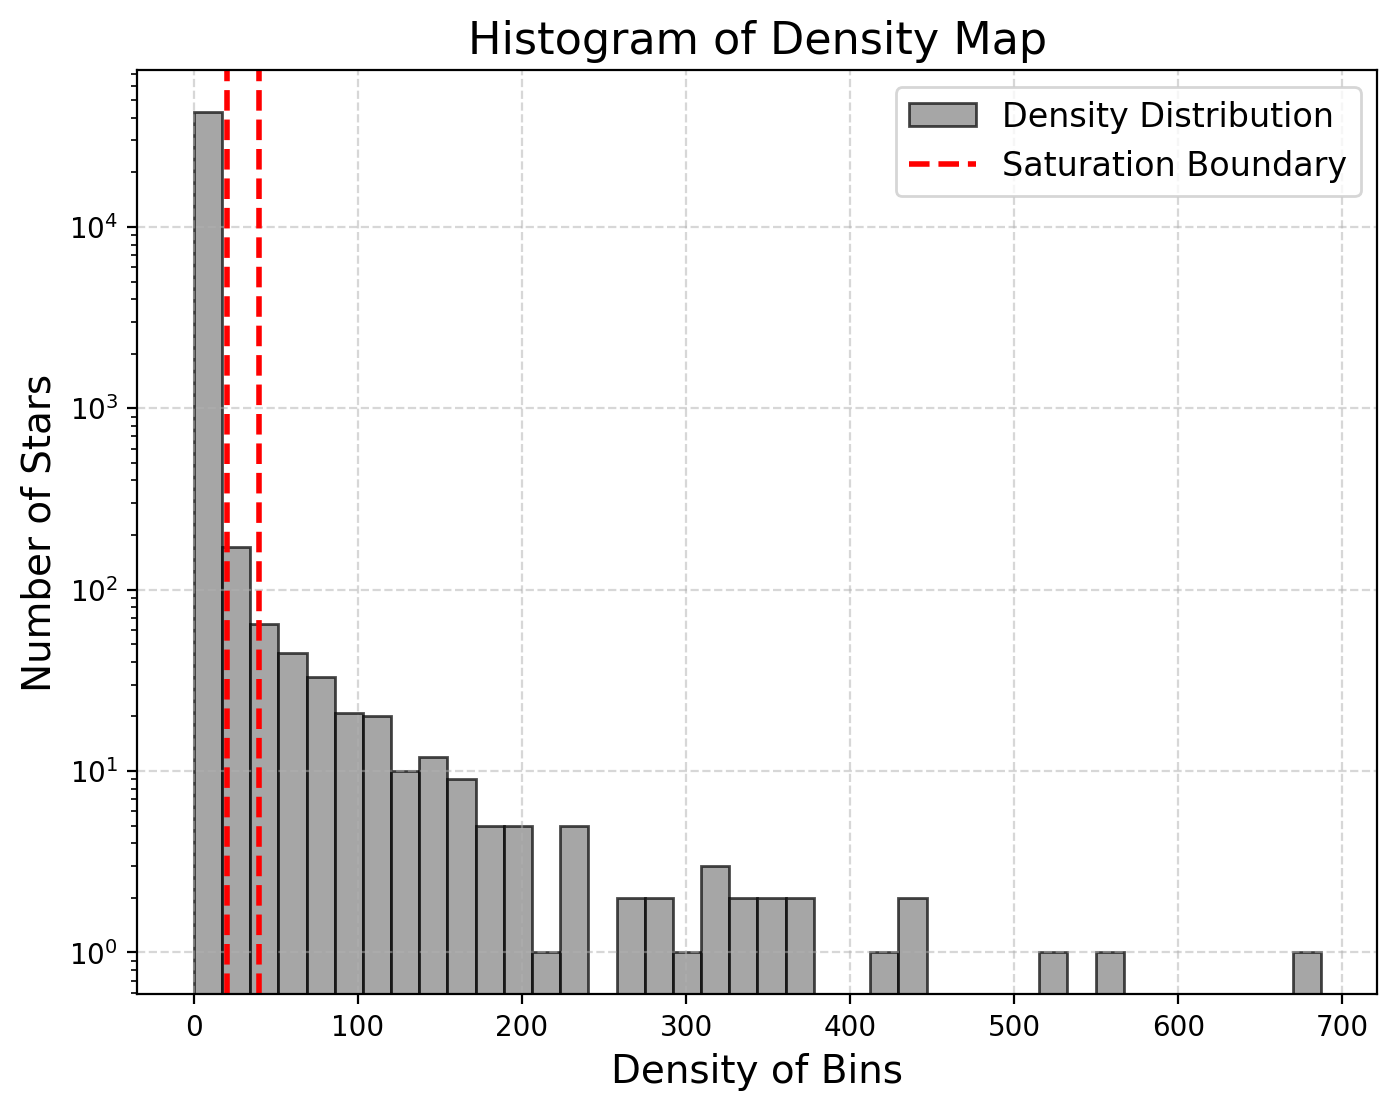

ValueError: either both or neither of x and y should be given

<Figure size 2000x1200 with 0 Axes>

In [42]:
plot_sky_density_healpy(AllSky_gaia_halo, nside=60, contrast=(78, 90), binning_method="normal", 
                             cmap_density="magma", cmap_rgb="visdir", log_scale=False)

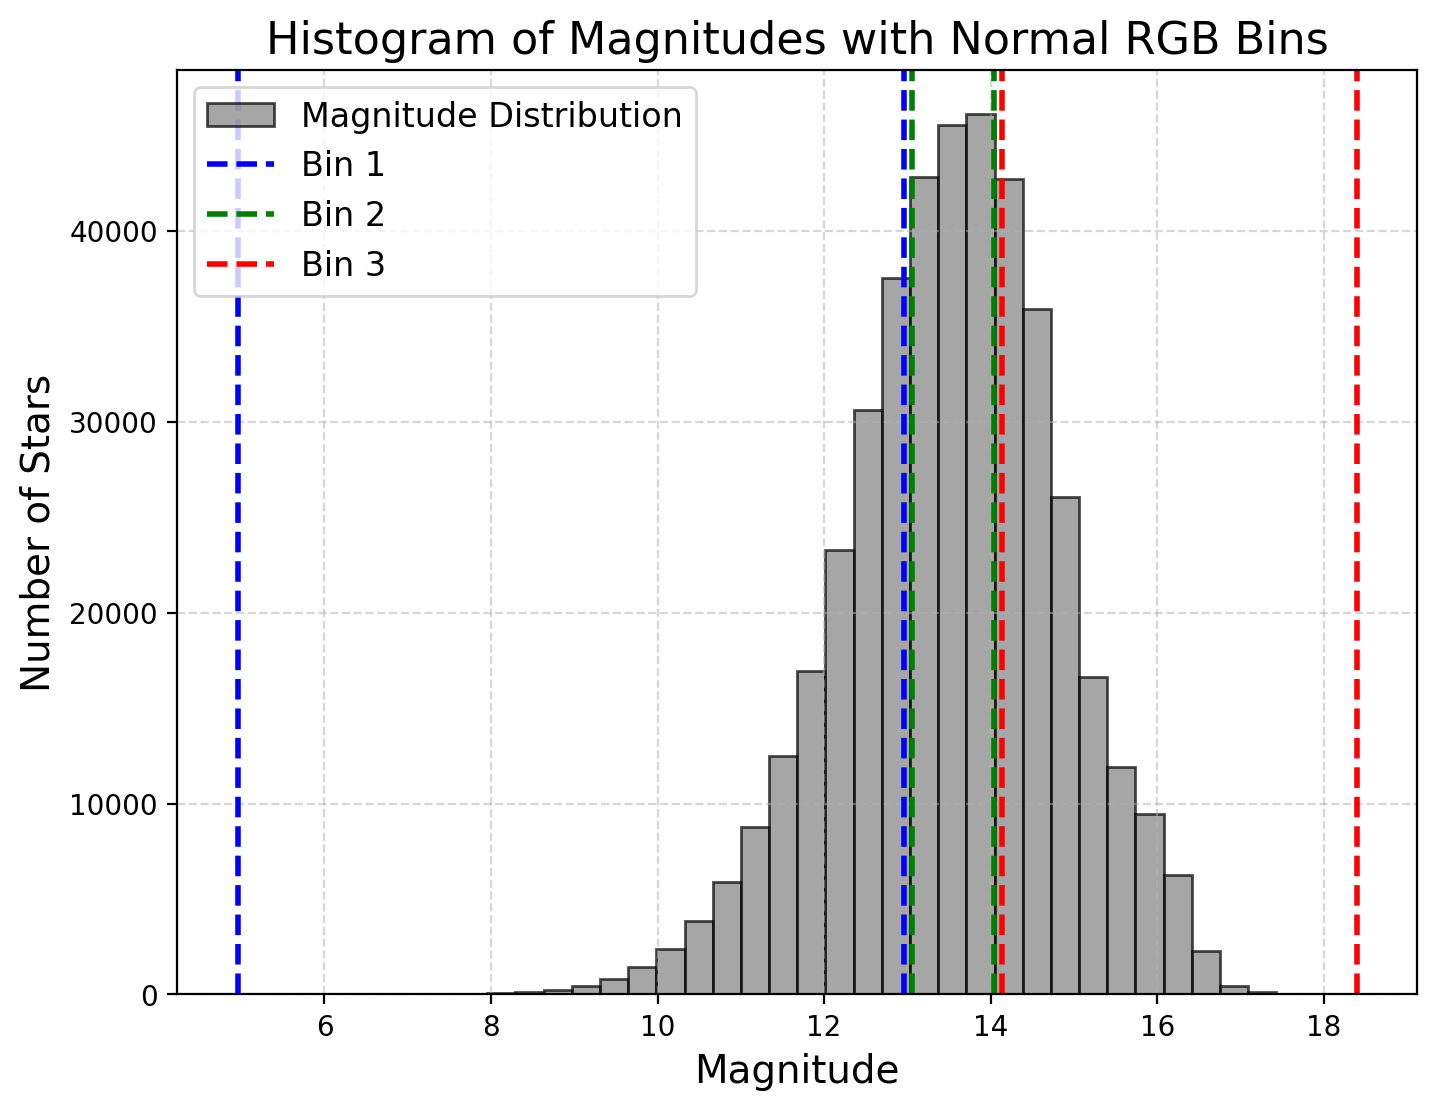

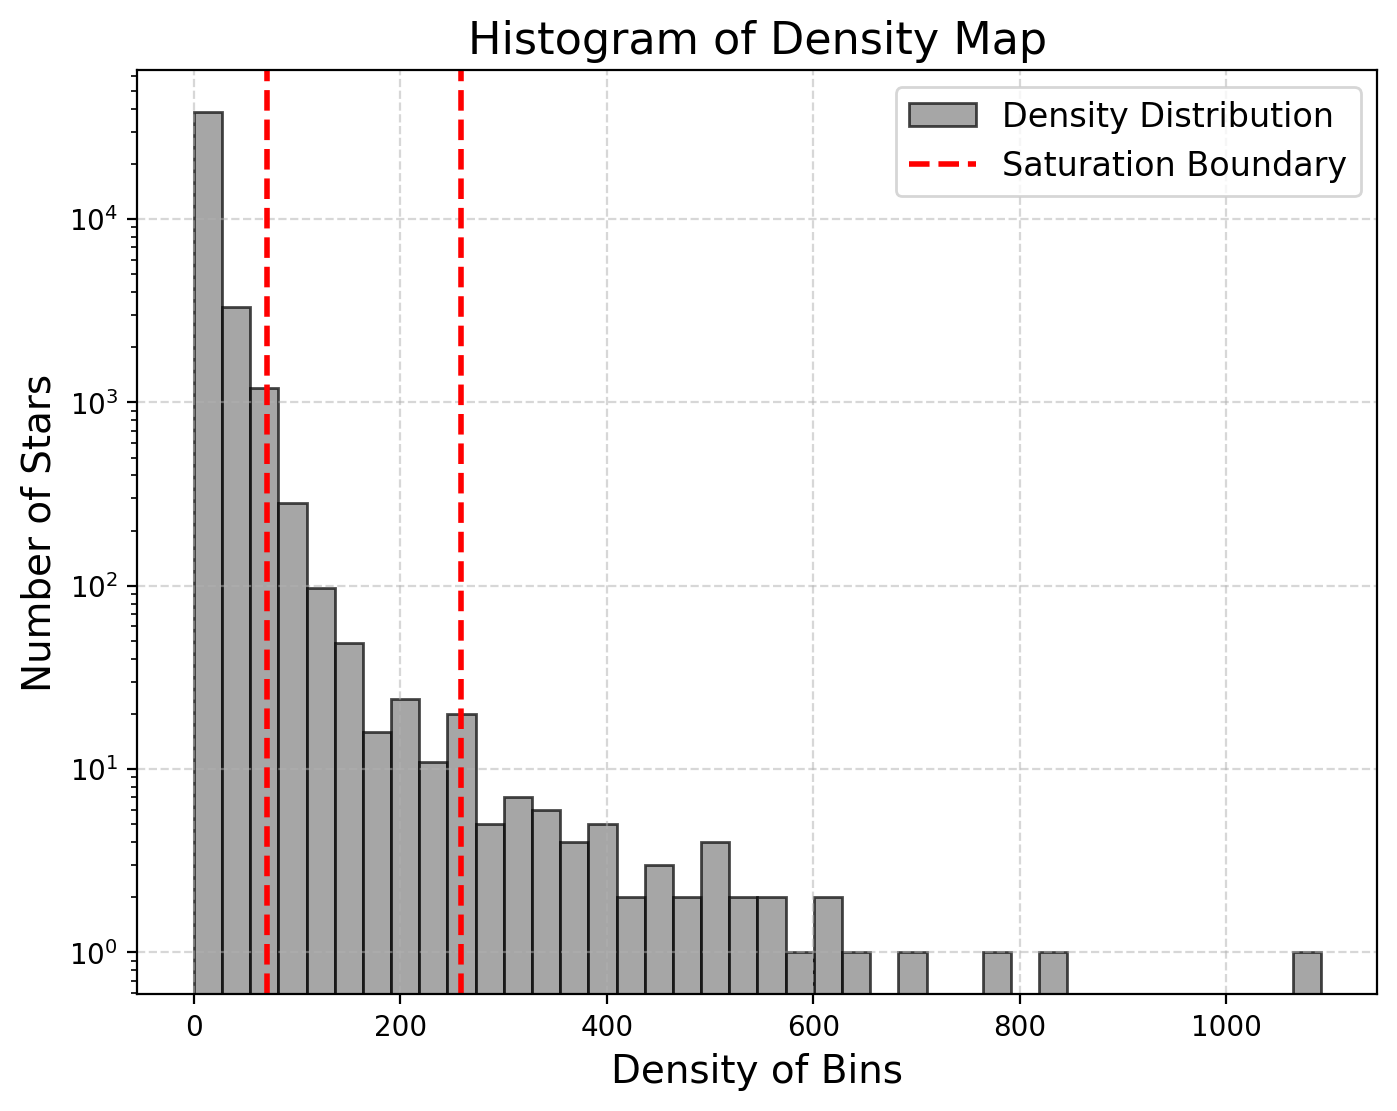

<Figure size 2000x1200 with 0 Axes>

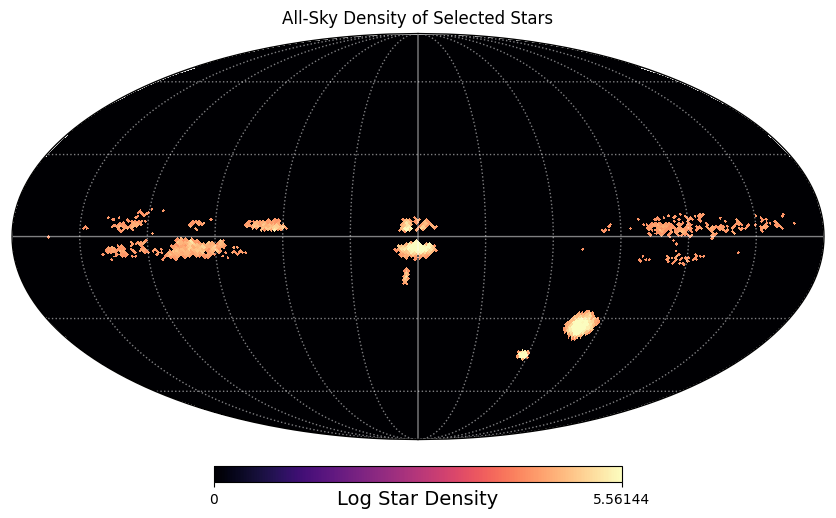

RGB Channel Shape: (43200,)
43200


<Figure size 2000x1200 with 0 Axes>

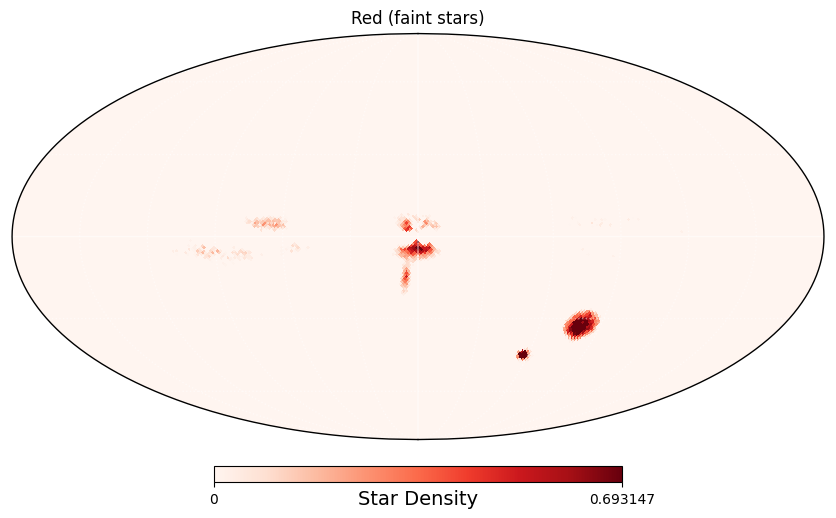

<Figure size 2000x1200 with 0 Axes>

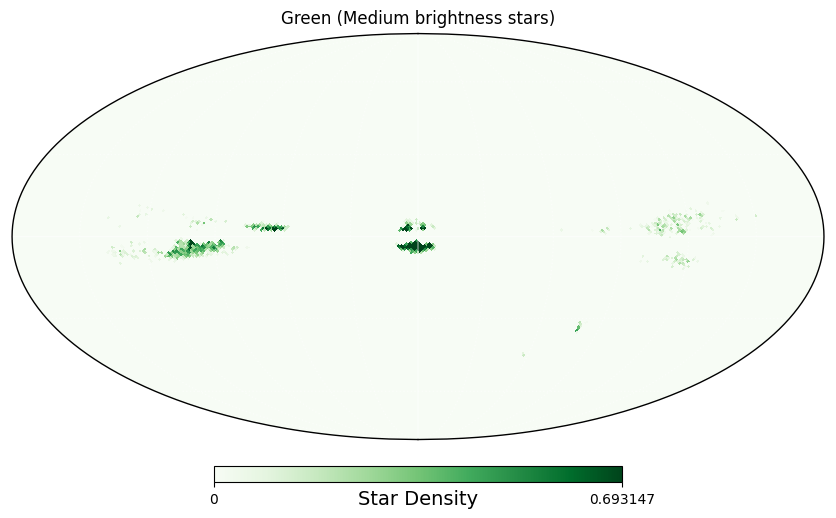

NameError: name '_channel' is not defined

<Figure size 2000x1200 with 0 Axes>

In [44]:
plot_sky_density_healpy(AllSky_gaia_halo, nside=60, contrast=(97, 99.8), binning_method="normal", 
                             cmap_density="magma", cmap_rgb="visdir", log_scale=True)